In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors

with h5py.File('American2023125/GIX.h5','r') as f:
    GIX = f['GIX'][:]
with h5py.File('American2023125/GIX_x.h5','r') as f:
    GIX_x = f['GIX'][:]
with h5py.File('American2023125/GIX_y.h5','r') as f:
    GIX_y = f['GIX'][:]

GIX = GIX.swapaxes(1, 2)
GIX_x = GIX_x.swapaxes(1, 2)
GIX_y = GIX_y.swapaxes(1, 2)

print(GIX.shape)
print(GIX_x.shape)
print(GIX_y.shape)

(2880, 26, 41)
(2880, 26, 41)
(2880, 26, 41)


In [2]:
lon = np.arange(-135, -95 + 1, 1)
lat = np.arange(25, 50 + 1, 1)
mins = np.arange(0, 1440, 0.5)

In [3]:
lon = lon[5:36]
lat = lat[6:]
GIX = GIX[:, 6:, 5:36]
GIX_x = GIX_x[:, 6:, 5:36]
GIX_y = GIX_y[:, 6:, 5:36]

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 创建地图投影
plt.figure(figsize=(4,2))
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制图像
im = ax.imshow(GIX_x[720, :, :], cmap='jet', origin='lower',
               extent=[lon.min(), lon.max(), lat.min(), lat.max()],
               transform=ccrs.PlateCarree(),vmax=-10,vmin=10)

# 添加海岸线
ax.add_feature(cfeature.COASTLINE)

# 设置坐标轴刻度向内
ax.tick_params(axis='both', direction='in')


# 设置横纵坐标轴刻度
ax.set_xticks(np.linspace(-130,-100,4))
ax.set_yticks(np.linspace(35,45,3))

# 添加颜色条
plt.colorbar(im, ax=ax, label='mTECU/km', shrink=0.4)
plt.title('LIM TEC-dx')

plt.savefig('LIM-dx.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

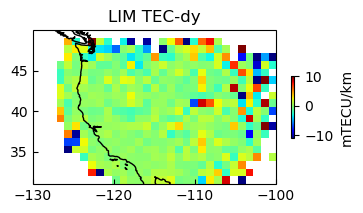

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 创建地图投影
plt.figure(figsize=(4,2))
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制图像
im = ax.imshow(GIX_y[720, :, :], cmap='jet', origin='lower',
               extent=[lon.min(), lon.max(), lat.min(), lat.max()],
               transform=ccrs.PlateCarree(),vmax=-10,vmin=10)

# 添加海岸线
ax.add_feature(cfeature.COASTLINE)

# 设置坐标轴刻度向内
ax.tick_params(axis='both', direction='in')


# 设置横纵坐标轴刻度
ax.set_xticks(np.linspace(-130,-100,4))
ax.set_yticks(np.linspace(35,45,3))

# 添加颜色条
plt.colorbar(im, ax=ax, label='mTECU/km', shrink=0.4)
plt.title('LIM TEC-dy')

plt.savefig('LIM-dy.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()